## Ensemble methods are based on the idea /hypothesis that weak models can be built upon and used together to create a much powerful model for prediction. In simpler terms, it is a paradigm where multiple models (week learners) are trained to solve the same problem and combined to get better results.
## The purpose of this notebook is to demonstrate the 3 types of ensemble methods i.e. Bagging, Boosting & Stacking

## Bagging: considers homogeneous weak learners, learns from them independently from each other in parallel and combines them following some kind of deterministic averaging process


In [2]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier

wine=load_wine()


In [13]:
wine.data.shape


(178, 13)

In [17]:
X,y=wine.data[:,11:13], wine.target

In [18]:
clf=DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier()

In [19]:
clf.score(X,y)

1.0

In [23]:
from sklearn.ensemble import BaggingClassifier

bg=BaggingClassifier(base_estimator=clf, max_samples=0.1,max_features=0.1,n_estimators=10)

In [24]:
bg.fit(X,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=0.1,
                  max_samples=0.1)

In [25]:
bg.score(X,y)

0.797752808988764

In [27]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

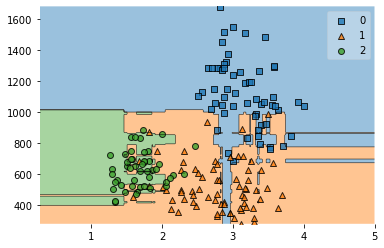

In [28]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X,y,bg)

## Random Forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems, it builds upon decision trees on different samples and take majority vote for classification and avg in case of regression.

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=10)
rf.fit(X,y)

RandomForestClassifier(n_estimators=10)

In [31]:
rf.score(X,y)

0.9887640449438202

<AxesSubplot:>

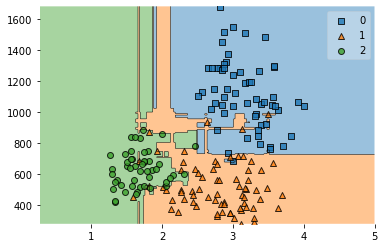

In [32]:
plot_decision_regions(X,y,rf)

# In adaptative boosting (often called “adaboost”), we try to define our ensemble model as a weighted sum of weak learners

0.601123595505618


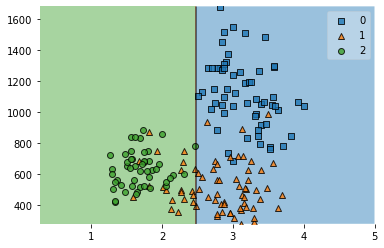

0.7303370786516854


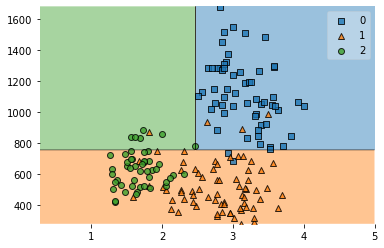

0.8595505617977528


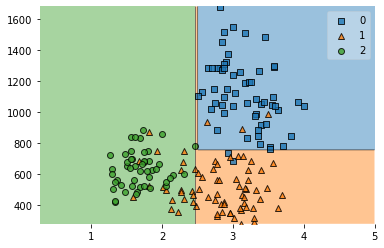

0.8595505617977528


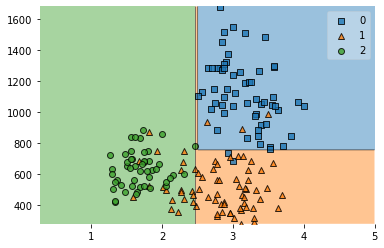

In [37]:
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
clf=DecisionTreeClassifier(criterion='entropy', max_depth=1)

n_estimators=[1,2,5,10]

for n in n_estimators:
    clf_boost=AdaBoostClassifier(clf,n_estimators=n)
    clf_boost.fit(X,y)
    print(clf_boost.score(X,y))
    plot_decision_regions(X,y,clf_boost)
    plt.show()
    

## GBM : Gradient Boosting
### In gradient boosting, the ensemble model we try to build is also a weighted sum of weak learners, gradient boosting can be considered as a generalization of adaboost to arbitrary differentiable loss functions.

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

model=GradientBoostingClassifier()

model.fit(x_train,y_train)

model.score(x_test,y_test)

0.9259259259259259

In [40]:
import xgboost as xgb

model=xgb.XGBClassifier()

model.fit(x_train,y_train)

model.score(x_test,y_test)

0.9074074074074074

## Ensemble Learning:
* Homogeneous ensemble methods : Bagging , Boosting
* Heterogeneous ensemble methods: Stacking

### Stacking often considers heterogeneous weak learners (different learning algorithms are combined) whereas bagging and boosting consider mainly homogeneous weak learners.

### The idea of stacking is to learn several different weak learners and combine them by training a meta-model to output predictions based on the multiple predictions returned by these weak models

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier

In [42]:
clfk = KNeighborsClassifier(n_neighbors=1)
clfg = GaussianNB()
clfr = RandomForestClassifier()
lr = LogisticRegression()

sclf=StackingClassifier(classifiers=[clfk,clfg,clfr], meta_classifier=lr)



Accuracy:: 0.6851851851851852


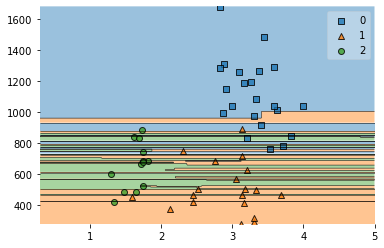

Accuracy:: 0.9259259259259259


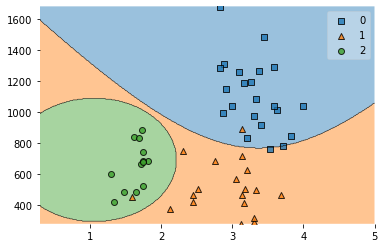

Accuracy:: 0.9259259259259259


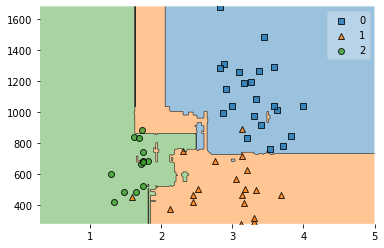

Accuracy:: 0.8888888888888888


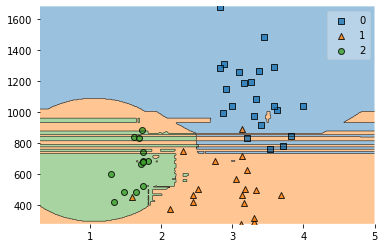

In [44]:
clfs=[clfk,clfg,clfr, sclf]

for classifier in clfs:
        classifier.fit(x_train,y_train)
        print('Accuracy::', classifier.score(x_test,y_test))
        plot_decision_regions(x_test,y_test,classifier)
        plt.show()
        